<a href="https://colab.research.google.com/github/khatriprajwol/Data-Visualization-/blob/main/Recreating%20The%20Master%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recreating The Master 
Here I would lke to present you one of my favorite topic again which is related to sport. In this project it focuses on top twenty most valuable soccer team over the year and how it changed. However, I will be recreting only one of it. Well, recreating masters work will not be easy but I will try my best. 

![Picture1](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes2.jpg)


The above visualization is from 2016 but I would like to create similar master piece with a current data. In order to make similar visualization I will need the name of a club and its information. I tried to search data through **ESPN** but I could not find it. Therefore my alternative option was [wikipedia](https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs).




![Picture2](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes.jpg)






Here is another diagram. As we can see the change in percentage from 2015 to 2016. Can we see any change? Yes, indeed. Let's see what we can expect in 2021. Well, the graph below shows the information how it changed in another year.

![Picture](https://www.statista.com/graphic/1/300578/team-value-of-soccer-teams.jpg)
The above graph can be found in this [link]("https://www.statista.com/statistics/300578/team-value-of-soccer-teams/"). I think this graph did not do a great job in visualization. No doubtt it provides the information but still not a great visualization. 

I am planning to use one of the first graph. It looks a great visualization to me. 

In [21]:
import requests
import pandas as pa
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [22]:
r = requests.get('https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

17

In [23]:
html_soup.title

<title>Forbes' list of the most valuable football clubs - Wikipedia</title>

In [24]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[5]
df

,Rank,Team,Country,Value ($M)[10],Debt as% of value[8],% changeon year,Revenue ($M)
0,1,Real Madrid,Spain,3645,3,12.0,694
1,2,Barcelona,Spain,3549,2,12.0,675
2,3,Manchester United,England,3317,20,7.0,625
3,4,Bayern Munich,Germany,2678,0,14.0,570
4,5,Arsenal,England,2017,17,54.0,524
5,6,Manchester City,England,1921,0,40.0,558
6,7,Chelsea,England,1661,0,21.0,505
7,8,Liverpool,England,1548,5,58.0,471
8,9,Juventus,Italy,1299,4,55.0,390
9,10,Tottenham Hotspur,England,1017,2,69.0,310


It is not a big data set but a perfect for me to recreate the above visualization. 
[link](https://github.com/nurfnick/Data_Viz/blob/main/RecreatingMasters.ipynb)


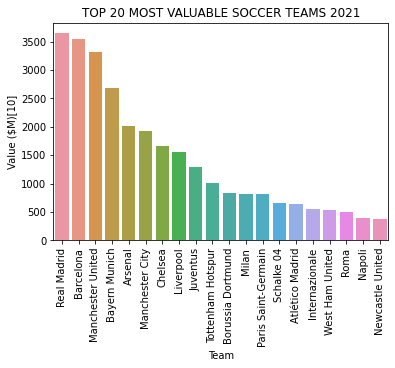

In [25]:
ax = sns.barplot(data = df, x = 'Team', y= "Value ($M)[10]", hue_order= None )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS 2021')
plt.show()

Well, the graph does not quick looks like that. But I will try to do it in a different way. Let's see if it will work. 